##### This is the notebook which contains the code for the Linear Regression using the diabetes using the scikitlearn 



### Import the libraries

In [19]:
from sklearn import datasets


### Load the datasets

In [20]:
diabetes = datasets.load_diabetes()

In [21]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

#### Description of the Diabetes dataset

In [22]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [25]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### Create the X and Y datasets

In [27]:
X = diabetes.data
y = diabetes.target


In [28]:
X.shape, y.shape

((442, 10), (442,))

### Import the library for data split

Assign 80% data for training 
Assign 20% data for testing 


In [31]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
X_train.shape, y_train.shape

((353, 10), (353,))

In [37]:
X_test.shape, y_test.shape

((89, 10), (89,))

### Linear Regression Model

In [38]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
model = linear_model.LinearRegression()

In [41]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

### **Prediction results**

In [44]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [ -50.25635321 -240.19191455  557.32793541  272.58531125 -892.24461241
  507.81952955  250.71105991  311.40543348  788.38820075   82.75169255]
Intercept: 152.55115144129425
Mean squared error (MSE): 3581.85
Coefficient of determination (R^2): 0.41


In [45]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


By default r2_score returns a floating number ([more details](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html))



In [46]:
r2_score(y_test, y_pred)

0.4057350372790888

In [47]:
r2_score(y_test, y_pred).dtype

dtype('float64')

#### We will be using the modulo operator to format the numbers by rounding it off.


In [49]:
'%f' % 0.523810833536016

'0.523811'

In [50]:
# Round of to 3 digits

'%.3f' % 0.523810833536016

'0.524'

In [51]:
# Round of to 2 digits 

'%.2f' % 0.523810833536016

'0.52'

#### **Scatter plots**

In [52]:
import seaborn as sns

In [53]:
# The data

y_test

array([ 64.,  65.,  73.,  90., 201., 191., 120., 128., 175.,  93., 263.,
       104., 198., 252.,  43., 292., 198., 171.,  77., 197.,  96., 303.,
        65., 244., 109., 144., 101.,  55.,  68., 332.,  72., 168., 310.,
        59.,  99.,  52.,  98., 270., 293., 185., 214., 242., 135., 185.,
       202.,  94., 170.,  59., 235.,  53., 202., 129., 104., 132.,  47.,
        60., 111., 151., 257.,  90., 161., 144., 128.,  95.,  96.,  68.,
       246.,  37.,  42., 243., 212., 195.,  51., 172.,  86., 283., 131.,
       177.,  84., 150.,  52., 178., 219., 296., 214., 258., 153.,  68.,
       202.])

In [54]:
import numpy as np
np.array(y_test)

array([ 64.,  65.,  73.,  90., 201., 191., 120., 128., 175.,  93., 263.,
       104., 198., 252.,  43., 292., 198., 171.,  77., 197.,  96., 303.,
        65., 244., 109., 144., 101.,  55.,  68., 332.,  72., 168., 310.,
        59.,  99.,  52.,  98., 270., 293., 185., 214., 242., 135., 185.,
       202.,  94., 170.,  59., 235.,  53., 202., 129., 104., 132.,  47.,
        60., 111., 151., 257.,  90., 161., 144., 128.,  95.,  96.,  68.,
       246.,  37.,  42., 243., 212., 195.,  51., 172.,  86., 283., 131.,
       177.,  84., 150.,  52., 178., 219., 296., 214., 258., 153.,  68.,
       202.])

In [55]:
y_pred

array([118.30810809, 124.96423677, 149.98651549, 146.50313018,
        92.85486328, 197.01813095, 160.09441752, 235.79693227,
       190.14421465,  89.87258139, 177.85244316, 155.24532454,
       181.10546617, 147.62719096,  63.91501434, 194.02704522,
       153.30186634, 178.54467091, 164.69656072, 190.77320842,
        84.49508949, 257.64991553, 104.02702574, 178.23897026,
       203.55824372, 188.51488419,  90.15344339,  39.41539971,
       113.48486675, 218.88042218, 110.66427471, 143.06236009,
       257.67714462, 136.84715442,  56.01228108,  67.53195616,
        81.54699055, 230.38660006, 196.41182988, 152.27725207,
       134.54150493, 264.8109737 , 101.97444376, 148.70911381,
       188.88620577, 102.67556752, 184.10784666,  71.48329215,
       168.21520826, 101.25700947, 150.21025146, 102.58331101,
       102.42498685, 245.8839448 ,  96.9434042 , 135.68888758,
       111.99202887, 203.13352971, 187.78053525, 112.95828028,
       187.00224538, 157.6300077 , 170.71781074, 148.73

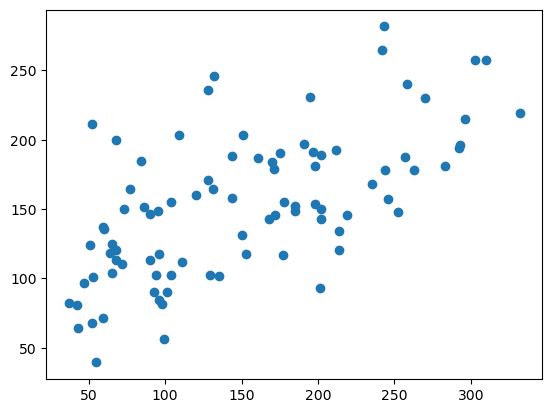

In [56]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)

plt.show()

<Axes: >

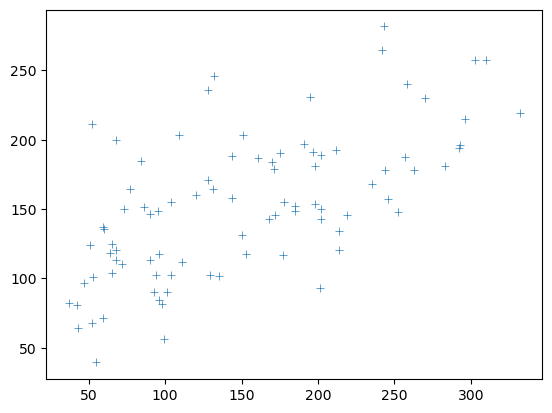

In [58]:
import seaborn as sns
sns.scatterplot(x=y_test, y=y_pred, marker="+")

<Axes: >

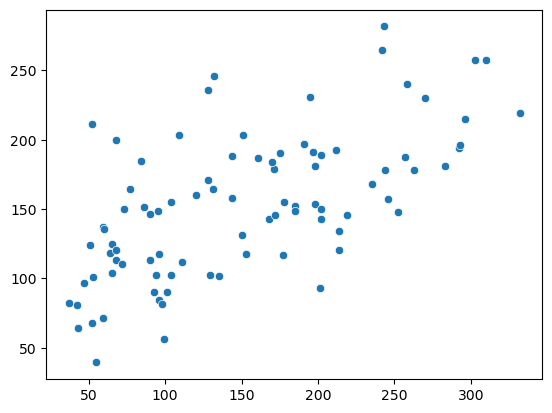

In [59]:
sns.scatterplot(x=y_test, y=y_pred, alpha=1)